# Data analyses Trails GPX

Date: 31-01-2020 <br>
Concept version: 1.0 <br>
Author: Pieter Lems  <br>

© Copyright 2019 Ministerie van Defensie

## Contents notebook
- Per trail
  - Import
  - Analyze
  - Visualize 
- Visualize all trails


## Datasets used in notebook. ("~/GeoStack-Course/Course-Datasets/GPX/") This is noted as ("../../../Course-Datasets/GPX/") in the notebook.
- Trails datasets 
   - ../../../Course-Datasets/GPX/SEP-26-09 64311 Biesbosch.gpx : National Park Noord-Brabantse Biesbosch, Drimmelen, Boat & Hike trail  
   - ../../../Course-Datasets/GPX/JAN-16-11 172053 Zeeland MNV.gpx : Zeeland, Brouwersdam Willemstad, Birdwatching Car route
   - ../../../Course-Datasets/GPX/JUN-03-11 151845 BiesboschLibellen.gpx :  National Park Zuid-Hollandse Biesbosch, Merwelanden, Dragonfly Hike trail
   - ../../../Course-Datasets/GPX/OKT-25-09 164243 Hamert Fiets.gpx : National Park Maasduinen, de Hamert, Biking Trail
   - ../../../Course-Datasets/GPX/SEP-25-09 182235 Hamert.gpx : National Park Maasduinen, de Hamert, Hiking trail 
---

### Importing required modules
---

In [1]:
import gpxpy
import datetime
import numpy as np
import pandas as pd

import cartopy        
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

---
### Define generic functions

### Function: create_df()
this function creates a dataframe from the GPX files

- parameter 1: The GPS-track data which needs to be appended to a dataframe

In [2]:
def create_df(data):

    df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])

    for point in data:
        df = df.append({'lon': point.longitude,
                        'lat' : point.latitude, 
                        'alt' : point.elevation,
                        'time' : point.time}, ignore_index=True)
    return df

---
### Function: transform_to_JSON()
This function exports the dataframe to the fileformat JSON. 

- parameters 1 : Dataframe which you want to clean
- parameters 2 : Name of output JSON file

In [3]:
def transform_to_JSON(df,name):
    
    output_path = "../../../Course-Datasets/JSON/Trail_JSON/" + name
    
    df.to_json(output_path,orient='records')
    
    return ("Transformation of "  + str(name) + " complete!")
    


---
### Function: create_plot()
This function creates a plot from the inserted data on the map.

- parameter 1: The dataframe you want to plot
- parameter 2: The longitude column in the dataframe
- parameter 3: The latitude column in the dataframe

In [4]:
def create_plot(df,lonColumn,latColumn):
    return plt.plot(df[lonColumn], df[latColumn])

---
### Function: init_cartopymap():
This function creates a new cartopyMap and then returns the map instance

In [5]:
def init_cartopymap():
    
    plt.figure(figsize = (20, 12))
    
    m = plt.axes(projection=ccrs.PlateCarree())

    m.coastlines(resolution='10m')
    
    m.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")
    
    m.add_feature(cfeature.OCEAN)
    
    m.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')
    
    m.add_feature(cfeature.RIVERS.with_scale('10m')) 
    
    m.add_feature(cfeature.BORDERS.with_scale('10m'))

    return m 

---
### Function: dfs_on_cartopymap():
This function creates a map and visualizes the inserted dataframes on a CartopyMap

- parameter 1: A list of dataframes, this can also be a list of just one dataframe
- parameter 2: The longitude column in the dataframe
- parameter 3: The latitude column in the dataframe
- parameter 4: The color of the datapoints
- parameter 5: The size of the datapoints

In [6]:
def dfs_on_cartopymap(dfList,lonColumn,latColumn,color,size):

    m = init_cartopymap()
    
    for df in dfList: 
        
        m.scatter(df[lonColumn], 
                  df[latColumn],
                  color=color, 
                  s = size)    
    return m

---
### Function: basic_analyses()
This function performs a basic GPX data analyses on an input file and returns a populated dataframe

- parameter 1: The file location of the GPX file

In [7]:
def basic_analyses(input_file):
    
    file = open(input_file, 'r')
    
    parsed_file = gpxpy.parse(file)
    
    print('\n--------------------------------BASIC INFORMATION-------------------------------\n\n')
    
    print("File info: " + str(parsed_file.tracks)+'\n')
    
    print("Tracks in file:" + str(len(parsed_file.tracks))+'\n')
    
    print("Segments in track: " + str(len(parsed_file.tracks[0].segments))+'\n')
    
    print("DataPoints in track: " + str(len(parsed_file.tracks[0].segments[0].points))+'\n')
    
    data = parsed_file.tracks[0].segments[0].points
    
    print("Start position and date :" + str(data[0])+'\n')
    
    print("End position and date :"  + str(data[-1])+'\n')
    
    df = create_df(data)
    
    print('\n------------------------------COLUMNS AND DATA TYPES----------------------------\n\n')
    
    print(df.dtypes)
    
    print('\n-----------------------------DATA FRAME (first 2 rows)---------------------------\n\n')
    
    return df

---
## Biesbosch
### National Park Noord-Brabantse Biesbosch, Drimmelen, Boat & Hike trail 

---

In [8]:
Biesbosch_file = open('../../../Course-Datasets/GPX/SEP-26-09 64311 Biesbosch.gpx', 'r')
Biesbosch = gpxpy.parse(Biesbosch_file)

#### Print amount of tracks in GPX file

In [9]:
len(Biesbosch.tracks)

1

#### Print amount of line segments in track

In [10]:
len(Biesbosch.tracks[0].segments)

1

#### Print length of track 

In [11]:
len(Biesbosch.tracks[0].segments[0].points)

739

#### Assign all trackpoints to a variable and print one

In [12]:
Biesbosch_data = Biesbosch.tracks[0].segments[0].points
Biesbosch_data[:1]

[GPXTrackPoint(51.706095, 4.811173, elevation=-61.87, time=datetime.datetime(2009, 9, 26, 11, 27, 59, tzinfo=SimpleTZ("Z")))]

#### Show start coordinates and DTG (Datetimegroup)

In [13]:
Biesbosch_data[0]

GPXTrackPoint(51.706095, 4.811173, elevation=-61.87, time=datetime.datetime(2009, 9, 26, 11, 27, 59, tzinfo=SimpleTZ("Z")))

#### Show end coordinates and DTG (Datetimegroup)

In [14]:
Biesbosch_data[-1]

GPXTrackPoint(51.706118, 4.811185, elevation=3.5, time=datetime.datetime(2009, 9, 26, 14, 43, 22, tzinfo=SimpleTZ("Z")))

#### Create a dataframe

In [15]:
Biesbosch = create_df(Biesbosch_data)

#### Plot track using MatplotLib

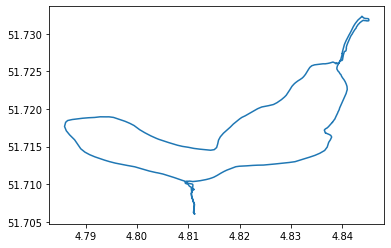

In [16]:
plt.plot(Biesbosch['lon'], Biesbosch['lat'])

#### Plot track using MatplotLib + Cartopy

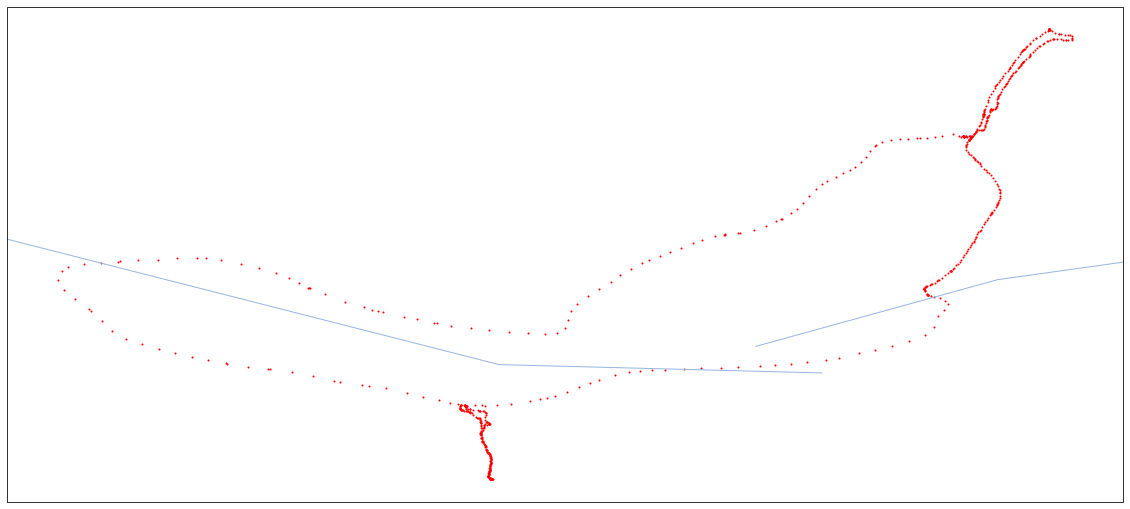

In [17]:
dfs_on_cartopymap([Biesbosch],'lon','lat',"red",1)

#### Plot datacolumns and their datatypes

In [18]:
Biesbosch.dtypes

lon     float64
lat     float64
alt     float64
time     object
dtype: object

#### Create table with columns and data types:

|Column|Type|Desc.|
|--|--|--|
|lon |    float64 | longitude coordinates |
|lat  |   float64 | latitiude coordinates | 
|alt   |  float64 | altitude coordinates |
|time  |   Datetime | datetime of transmission|

#### Transform dataframe to JSON file format

In [19]:
transform_to_JSON(Biesbosch,'Trail_Biesbosch.json')

'Transformation of Trail_Biesbosch.json complete!'

---
## Biesbosch Libellen
### National Park Zuid-Hollandse Biesbosch, Merwelanden, Dragonfly Hike trail
---

#### Perform basic analyses of trail and assign dataframe returned to a variable.

In [20]:
Biesbosch_Lib = basic_analyses('../../../Course-Datasets/GPX/JUN-03-11 151845 BiesboschLibellen.gpx')
Biesbosch_Lib


--------------------------------BASIC INFORMATION-------------------------------


File info: [GPXTrack(name='JUN-03-11 15:18:45 BiesboschLibellen', segments=[GPXTrackSegment(points=[...])])]

Tracks in file:1

Segments in track: 1

DataPoints in track: 493

Start position and date :[trkpt:51.807363,4.763983@-128.68@2011-06-03 10:52:05+00:00]

End position and date :[trkpt:51.807439,4.764375@6.39@2011-06-03 13:20:14+00:00]


------------------------------COLUMNS AND DATA TYPES----------------------------


lon     float64
lat     float64
alt     float64
time     object
dtype: object

-----------------------------DATA FRAME (first 2 rows)---------------------------




,lon,lat,alt,time
0,4.763983,51.807363,-128.68,2011-06-03 10:52:05+00:00
1,4.763965,51.807414,-129.16,2011-06-03 10:52:34+00:00
2,4.763922,51.807504,-131.08,2011-06-03 10:52:44+00:00
3,4.763938,51.807511,-129.64,2011-06-03 10:52:45+00:00
4,4.764133,51.807506,-131.56,2011-06-03 10:52:56+00:00
...,...,...,...,...
488,4.764344,51.807342,5.91,2011-06-03 13:18:47+00:00
489,4.764333,51.807333,7.35,2011-06-03 13:18:58+00:00
490,4.764378,51.807443,7.35,2011-06-03 13:20:11+00:00
491,4.764375,51.807439,3.02,2011-06-03 13:20:13+00:00


#### Plot track using MatplotLib.

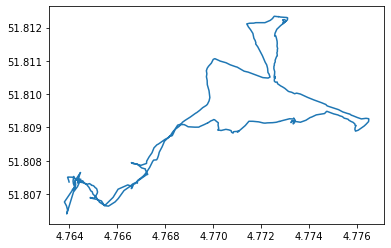

In [21]:
create_plot(Biesbosch_Lib,'lon','lat') 

#### Plot track using MatplotLib on a CartopyMap.

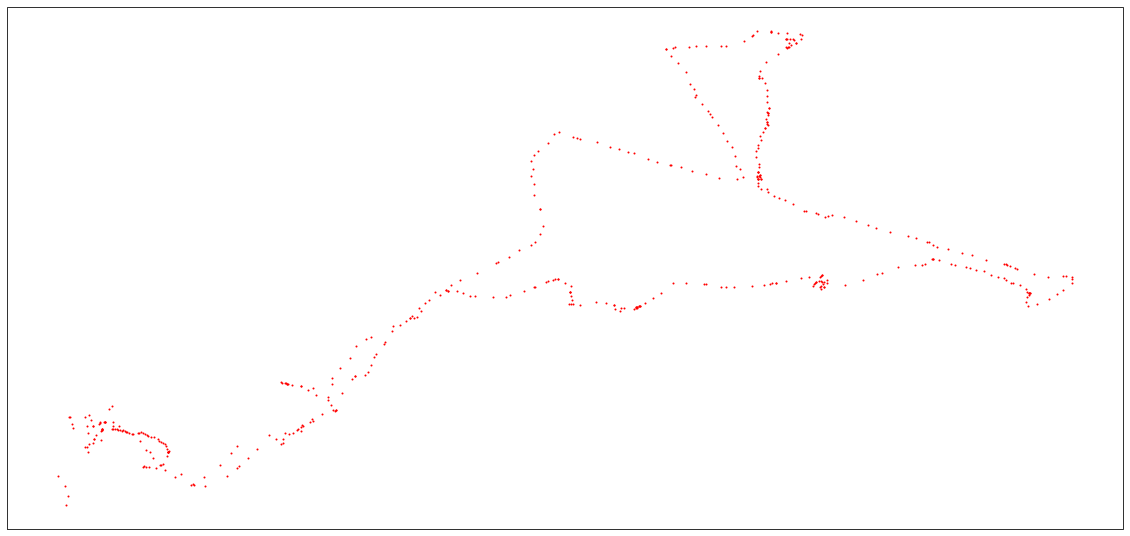

In [22]:
dfs_on_cartopymap([Biesbosch_Lib],'lon','lat','red',1)

#### Transform dataframe to JSON file format.

In [23]:
transform_to_JSON(Biesbosch_Lib,'Trail-Biesbosch-Libellen.json')

'Transformation of Trail-Biesbosch-Libellen.json complete!'

---
## Zeeland
### Zeeland, Brouwersdam Willemstad, Birdwatching car route
---

#### Perform basic analyses of trail and assign dataframe returned to a variable.

In [24]:
Zeeland = basic_analyses('../../../Course-Datasets/GPX/JAN-16-11 172053 Zeeland MNV.gpx')
Zeeland


--------------------------------BASIC INFORMATION-------------------------------


File info: [GPXTrack(name='JAN-16-11 17:20:53 Zeeland MNV', segments=[GPXTrackSegment(points=[...])])]

Tracks in file:1

Segments in track: 1

DataPoints in track: 937

Start position and date :[trkpt:51.690082,3.825755@-53.22@2011-01-16 11:25:51+00:00]

End position and date :[trkpt:51.63361,4.537248@-53.22@2011-01-16 15:53:26+00:00]


------------------------------COLUMNS AND DATA TYPES----------------------------


lon     float64
lat     float64
alt     float64
time     object
dtype: object

-----------------------------DATA FRAME (first 2 rows)---------------------------




,lon,lat,alt,time
0,3.825755,51.690082,-53.22,2011-01-16 11:25:51+00:00
1,3.825772,51.690129,-53.22,2011-01-16 11:25:52+00:00
2,3.825801,51.690174,-52.74,2011-01-16 11:25:53+00:00
3,3.825845,51.690222,-52.25,2011-01-16 11:25:54+00:00
4,3.825900,51.690273,-51.77,2011-01-16 11:25:55+00:00
...,...,...,...,...
932,4.537029,51.634344,-52.25,2011-01-16 15:53:22+00:00
933,4.537140,51.634169,-52.74,2011-01-16 15:53:23+00:00
934,4.537207,51.633989,-53.22,2011-01-16 15:53:24+00:00
935,4.537249,51.633801,-53.22,2011-01-16 15:53:25+00:00


#### Plot track using MatplotLib.

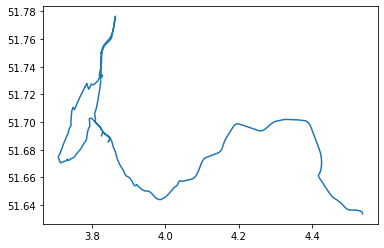

In [25]:
create_plot(Zeeland,'lon','lat') 

#### Plot track using MatplotLib on a CartopyMap.

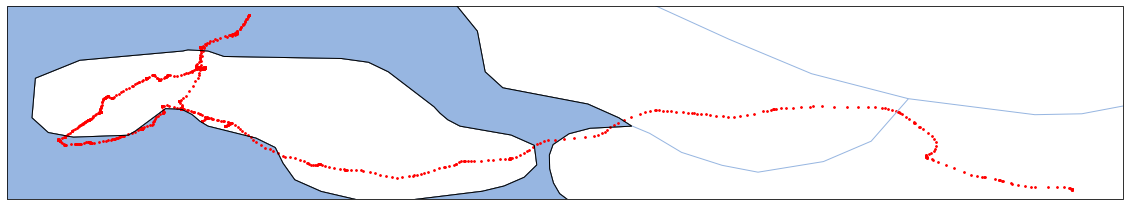

In [26]:
dfs_on_cartopymap([Zeeland],'lon','lat','red',3)

#### Transform dataframe to JSON file format.

In [27]:
transform_to_JSON(Zeeland,'Trail_ZeelandMNV.json')

'Transformation of Trail_ZeelandMNV.json complete!'

---
##  Hamert Biking
### National Park Maasduinen, de Hamert, Biking Trail
---

#### Perform basic analyses of trail and assign dataframe returned to a variable.

In [28]:
Hamert_Bike = basic_analyses('../../../Course-Datasets/GPX/OKT-25-09 164243 Hamert Fiets.gpx')
Hamert_Bike 


--------------------------------BASIC INFORMATION-------------------------------


File info: [GPXTrack(name='OKT-25-09 16:42:43 Hamert Fiets', segments=[GPXTrackSegment(points=[...])])]

Tracks in file:1

Segments in track: 1

DataPoints in track: 422

Start position and date :[trkpt:51.507754,6.170593@25.61@2009-10-25 13:52:18+00:00]

End position and date :[trkpt:51.507981,6.169311@4.46@2009-10-25 15:43:13+00:00]


------------------------------COLUMNS AND DATA TYPES----------------------------


lon     float64
lat     float64
alt     float64
time     object
dtype: object

-----------------------------DATA FRAME (first 2 rows)---------------------------




,lon,lat,alt,time
0,6.170593,51.507754,25.61,2009-10-25 13:52:18+00:00
1,6.170593,51.507754,28.98,2009-10-25 13:52:19+00:00
2,6.170593,51.507754,26.09,2009-10-25 13:52:20+00:00
3,6.170593,51.507754,25.13,2009-10-25 13:52:25+00:00
4,6.170593,51.507754,26.09,2009-10-25 13:52:37+00:00
...,...,...,...,...
417,6.169311,51.507982,3.50,2009-10-25 15:42:36+00:00
418,6.169311,51.507982,6.87,2009-10-25 15:42:56+00:00
419,6.169311,51.507982,3.02,2009-10-25 15:42:57+00:00
420,6.169311,51.507981,3.02,2009-10-25 15:43:11+00:00


#### Plot track using MatplotLib.

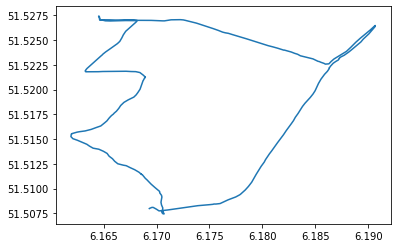

In [29]:
create_plot(Hamert_Bike,'lon','lat') 

#### Plot track using MatplotLib on a CartopyMap.

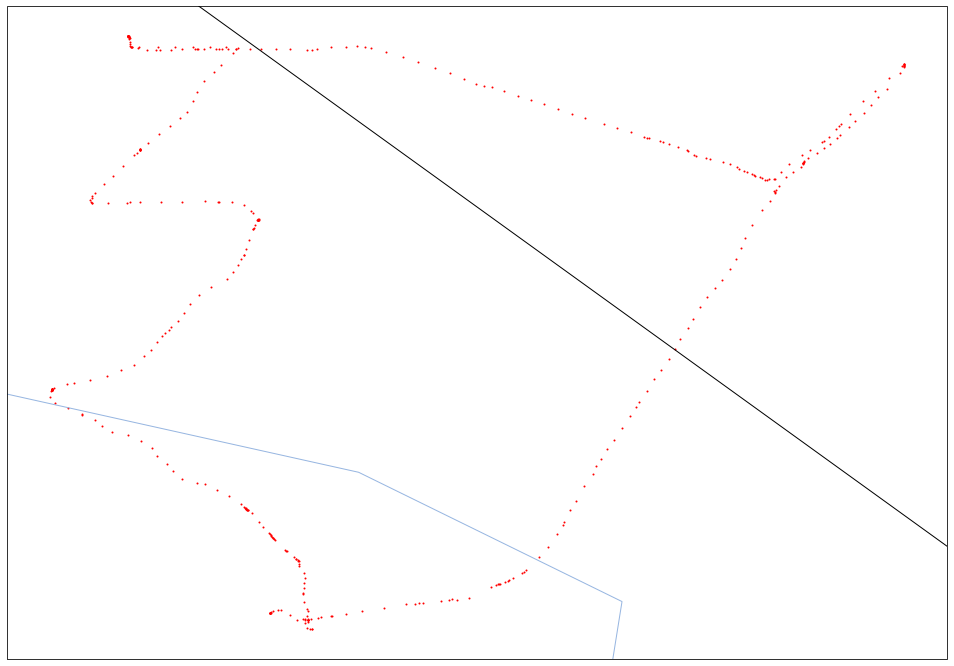

In [30]:
dfs_on_cartopymap([Hamert_Bike],'lon','lat','red',1)

#### Transform dataframe to JSON file format.

In [31]:
transform_to_JSON(Hamert_Bike,'Trail-Hamert-Bike.json')

'Transformation of Trail-Hamert-Bike.json complete!'

---
## Hamert Hiking
### National Park Maasduinen, de Hamert, Hiking trail 
---

#### Perform basic analyses of trail and assign dataframe returned to a variable.

In [32]:
Hamert_Hike = basic_analyses('../../../Course-Datasets/GPX/SEP-25-09 182235 Hamert.gpx')
Hamert_Hike 


--------------------------------BASIC INFORMATION-------------------------------


File info: [GPXTrack(name='SEP-25-09 18:22:35 Hamert', segments=[GPXTrackSegment(points=[...])])]

Tracks in file:1

Segments in track: 1

DataPoints in track: 1483

Start position and date :[trkpt:51.507603,6.170338@-38.32@2009-09-25 11:44:19+00:00]

End position and date :[trkpt:51.507615,6.170335@13.12@2009-09-25 16:22:30+00:00]


------------------------------COLUMNS AND DATA TYPES----------------------------


lon     float64
lat     float64
alt     float64
time     object
dtype: object

-----------------------------DATA FRAME (first 2 rows)---------------------------




,lon,lat,alt,time
0,6.170338,51.507603,-38.32,2009-09-25 11:44:19+00:00
1,6.170338,51.507604,-34.95,2009-09-25 11:44:20+00:00
2,6.170333,51.507606,-30.62,2009-09-25 11:44:23+00:00
3,6.170329,51.507607,-26.78,2009-09-25 11:44:25+00:00
4,6.170324,51.507607,-23.90,2009-09-25 11:44:27+00:00
...,...,...,...,...
1478,6.170334,51.507614,12.63,2009-09-25 16:21:30+00:00
1479,6.170334,51.507614,12.15,2009-09-25 16:21:37+00:00
1480,6.170334,51.507614,12.63,2009-09-25 16:21:39+00:00
1481,6.170335,51.507615,13.12,2009-09-25 16:22:12+00:00


#### Plot track using MatplotLib.

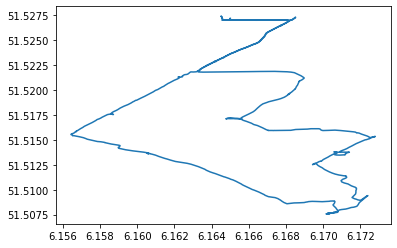

In [33]:
create_plot(Hamert_Hike,'lon','lat') 

#### Plot track using MatplotLib on a CartopyMap.

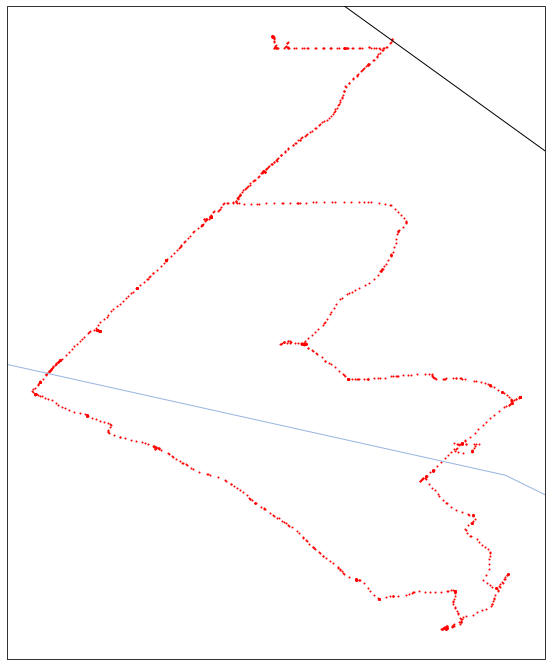

In [34]:
dfs_on_cartopymap([Hamert_Hike],'lon','lat','red',1)

#### Transform dataframe to JSON file format.

In [35]:
transform_to_JSON(Hamert_Hike,'Trail-Hamert-Hike.json')

'Transformation of Trail-Hamert-Hike.json complete!'

---
## Visualizing all GPS-tracks on one Cartopy Map
### Done by passing a list of all dataframes in this notebook to the function 
---

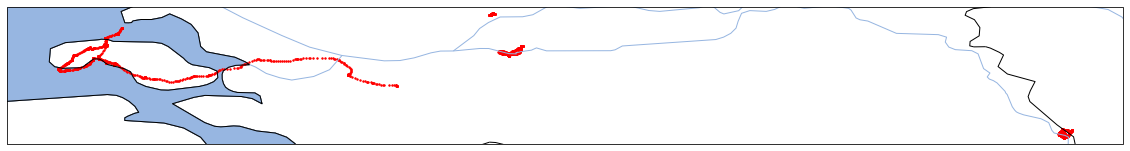

In [36]:
dfs_on_cartopymap([Zeeland, 
                   Biesbosch_Lib, 
                   Biesbosch, 
                   Hamert_Bike,
                   Hamert_Hike],'lon','lat','red',2)

---
# THIS IS A TEMPLATE
## TITLE
### SUBTITLE
---

#### Perform basic analyses of trail and assign dataframe returned to a variable.

#### Plot track using MatplotLib.

#### Plot track using MatplotLib on a CartopyMap.

#### Transform dataframe to JSON file format.